In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
# instantiate the model and set parameters
model = Prophet (interval_width=0.95, 
                 growth='linear',
                 daily_seasonality=False, 
                 weekly_seasonality=True, 
                 yearly_seasonality=True,
                 seasonality_mode = 'multiplicative')

In [3]:
df = pd.read_csv('sales.csv', 
                 sep=';', 
                 dayfirst=True, 
                 parse_dates=['date'], 
                 decimal=',', 
                 usecols=['date', 'amount'])
df.columns =['ds','y']
print(df.head(10))
print(df.info())

          ds    y
0 2010-01-01  120
1 2010-01-02  130
2 2010-01-03  140
3 2010-01-04  150
4 2010-01-05  160
5 2010-01-06  170
6 2010-01-07  180
7 2010-01-08  190
8 2010-01-09  200
9 2010-01-10  210
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3652 non-null   datetime64[ns]
 1   y       3652 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 57.2 KB
None


In [4]:
# fit the model to historical data
model.fit(df.iloc[:730])

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [5]:
future_pd = model.make_future_dataframe(
    periods=90,
    freq='d',
    include_history=True
)

In [6]:
# predict over the dataset
forecast_pd = model.predict(future_pd)

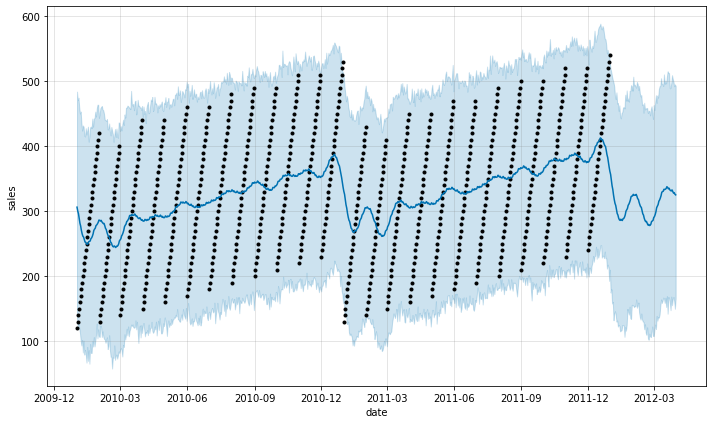

In [7]:
figure = model.plot(forecast_pd,xlabel='date', ylabel='sales')

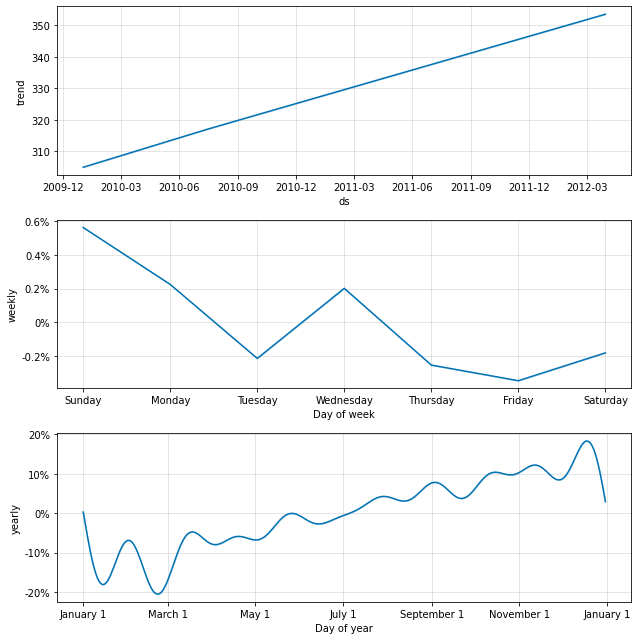

In [8]:
figure2 = model.plot_components(forecast_pd)